In [1]:
# Initial imports.
import pandas as pd
import numpy as np
from path import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import export_graphviz
import sqlite3

In [2]:
conn = sqlite3.connect('../HomelessData.db')
c = conn.cursor()

In [3]:
# Loading data
df_2018 = pd.read_sql("SELECT * FROM CocData WHERE year = 2018", con = conn)

df_2018.head()

,Coc,Total,Emergency,Transitional,SafeHaven,RapidRehousing,PermanentSupportive,PermanentOther,Year,CocYear,Total:1,Unsheltered,Sheltered
0,AK-500,1028,749,279,0,125,604,71,2018,AK-500 2018,1094,94,1000
1,AK-501,912,649,263,0,90,344,0,2018,AK-501 2018,922,215,707
2,AL-500,911,569,308,34,191,1768,0,2018,AL-500 2018,901,219,682
3,AL-501,435,298,137,0,60,203,0,2018,AL-501 2018,551,233,318
4,AL-502,210,102,108,0,0,50,0,2018,AL-502 2018,256,22,234


In [4]:
df_2018=df_2018.drop(['Total:1', 'Sheltered', 'Total', 'CocYear', 'Coc', 'Year'], axis=1)

In [5]:
df_2018.head()

,Emergency,Transitional,SafeHaven,RapidRehousing,PermanentSupportive,PermanentOther,Unsheltered
0,749,279,0,125,604,71,94
1,649,263,0,90,344,0,215
2,569,308,34,191,1768,0,219
3,298,137,0,60,203,0,233
4,102,108,0,0,50,0,22


In [7]:
# Define the features set.
X = df_2018.copy()
X = X.drop("Unsheltered", axis=1)
X.head()

,Emergency,Transitional,SafeHaven,RapidRehousing,PermanentSupportive,PermanentOther
0,749,279,0,125,604,71
1,649,263,0,90,344,0
2,569,308,34,191,1768,0
3,298,137,0,60,203,0
4,102,108,0,0,50,0


In [9]:
# Define the target set.
y = df_2018["Unsheltered"].ravel()
y[:5]

array([ 94, 215, 219, 233,  22], dtype=int64)

In [10]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [11]:
regr = RandomForestRegressor(max_depth=3, random_state=0)

In [12]:
reg_model = regr.fit(X, y)

In [13]:
importances = reg_model.feature_importances_
importances

array([0.03938816, 0.4557116 , 0.03504789, 0.25405945, 0.13602616,
       0.07976673])

In [14]:
# We can sort the features by their importance.
sorted(zip(reg_model.feature_importances_, X.columns), reverse=True)

[(0.45571160332194227, 'Transitional'),
 (0.25405945336563385, 'RapidRehousing'),
 (0.13602616238643098, 'PermanentSupportive'),
 (0.07976672904145705, 'PermanentOther'),
 (0.039388161128385585, 'Emergency'),
 (0.03504789075615036, 'SafeHaven')]

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt

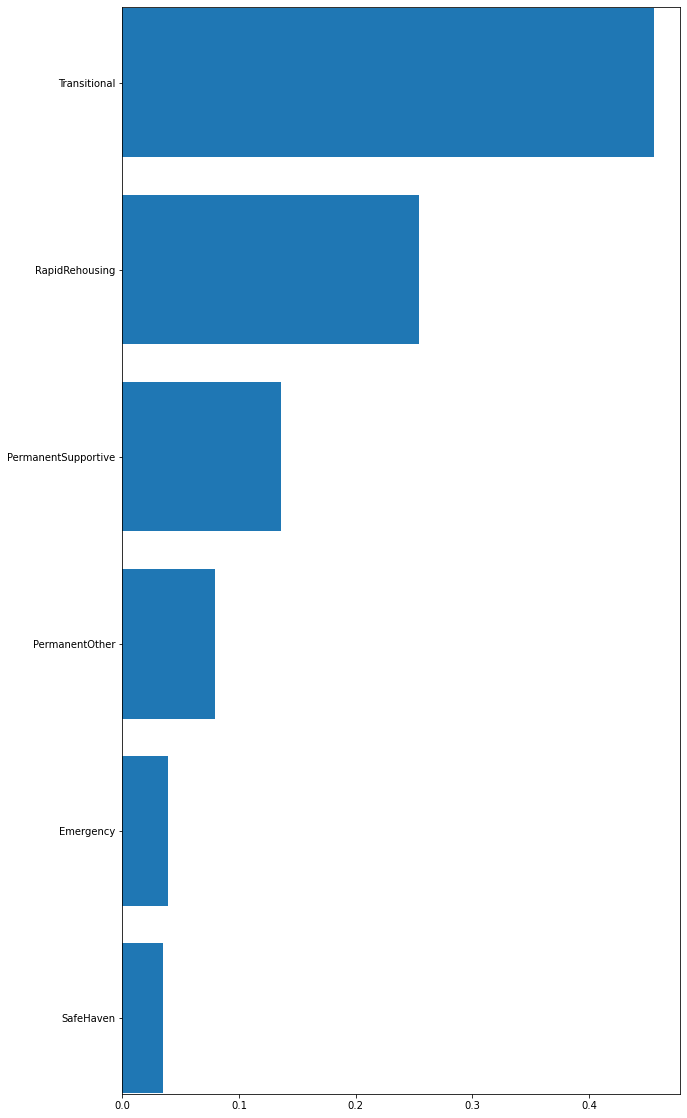

In [16]:
features = sorted(zip(X.columns, reg_model.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,20)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [17]:
estimator = reg_model.estimators_[5]

[Text(0.5, 0.875, 'X[1] <= 1656.0\nsquared_error = 552527.732\nsamples = 246\nvalue = 356.542'),
 Text(0.25, 0.625, 'X[3] <= 955.0\nsquared_error = 271954.77\nsamples = 242\nvalue = 291.229'),
 Text(0.125, 0.375, 'X[4] <= 942.5\nsquared_error = 169930.245\nsamples = 232\nvalue = 239.335'),
 Text(0.0625, 0.125, 'squared_error = 85670.236\nsamples = 192\nvalue = 175.756'),
 Text(0.1875, 0.125, 'squared_error = 478535.13\nsamples = 40\nvalue = 571.237'),
 Text(0.375, 0.375, 'X[3] <= 982.5\nsquared_error = 1161274.72\nsamples = 10\nvalue = 1411.529'),
 Text(0.3125, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 4078.0'),
 Text(0.4375, 0.125, 'squared_error = 241701.467\nsamples = 9\nvalue = 1056.0'),
 Text(0.75, 0.625, 'X[2] <= 37.5\nsquared_error = 2872874.816\nsamples = 4\nvalue = 3939.429'),
 Text(0.625, 0.375, 'X[1] <= 2024.5\nsquared_error = 309946.889\nsamples = 2\nvalue = 2095.333'),
 Text(0.5625, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 1308.0'),
 Text(0.6875, 0.125, 's

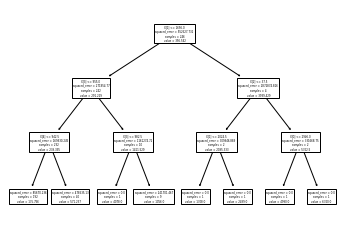

In [18]:
from sklearn import tree
tree.plot_tree(reg_model.estimators_[0])